In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image


In [98]:
#Read Image

img = cv2.imread('melanoma_database/26.jpg')


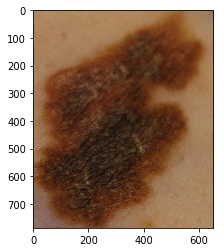

In [99]:
#Display Image

img2 = img[:,:,::-1]
plt.imshow(img2)


In [100]:
#resized image 

resized_image = cv2.resize(img, (300,300)) 

In [101]:
#Display Image


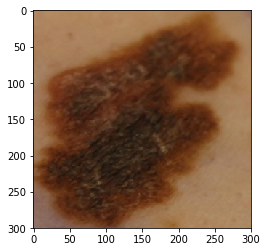

In [102]:
# apply the 3x3 median filter on the image

processed_image = cv2.medianBlur(resized_image, 3)

# display image

processed_image1 = processed_image[:,:,::-1]

plt.imshow(processed_image1)



In [103]:
gray = cv2.cvtColor(processed_image,cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



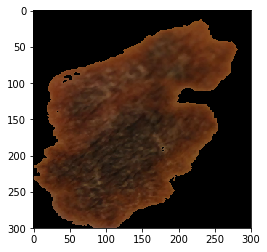

In [104]:
#Preenche os quatro cantos da imagem binária

w, h = mask.shape[::-1]
cv2.floodFill(mask, None, (0, 0), 0)
cv2.floodFill(mask, None, (w-1, 0), 0)
cv2.floodFill(mask, None, (0, h-1), 0)
cv2.floodFill(mask, None, (w-1, h-1), 0)


#Lógica AND para obter da imagem original a encontrada pela criação do mask

img = cv2.bitwise_and(processed_image, processed_image, mask=mask )


img1 = img[:,:,::-1]

plt.imshow(img1)



In [105]:
kernel = np.ones((3,3),np.uint8)

#Canny Edges

edges = cv2.Canny(img, 100,200)
dilate = cv2.dilate(edges,kernel,iterations=1)
dilate = cv2.bitwise_not(dilate)


In [106]:
#Lógica OR para retirar da imagem original os pêlos encontrados

img = cv2.bitwise_or(img, img, mask=dilate )
#cv2.imshow('Edges',img)
#cv2.waitKey(0)

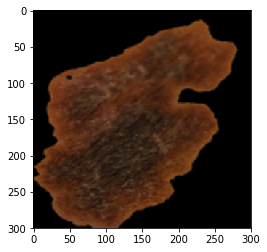

In [107]:
#Interpolação da imagem para preencher os vazios

dilate = cv2.bitwise_not(dilate)
inpaint = cv2.inpaint(img, dilate, 3,cv2.INPAINT_TELEA)


inpaint1 = inpaint[:,:,::-1]

plt.imshow(inpaint1)


Mean = 200.6, standard deviation = 279.5


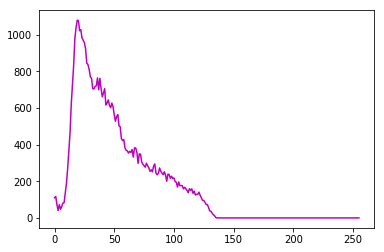

In [108]:
#processamento cor


colors = ('b', 'g', 'r')

hist = {}
for i, col in enumerate(colors):
    hist[i] = cv2.calcHist([inpaint], [i], None, [256], [1, 256])
    #plt.plot(hist[i], color=col)

ahist = (hist[0] + hist[1] + hist[2]) / 3

mean = np.mean(ahist).item()
std = np.std(ahist).item()
print ("Mean = {:.1f}, standard deviation = {:.1f}".format(mean, std))

plt.plot(ahist, color='m')
plt.show()




In [109]:
from sklearn.cluster import KMeans

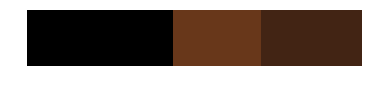

In [110]:
def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar


img = cv2.cvtColor(inpaint, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()

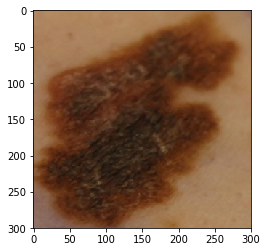

In [111]:
processed_image1 = processed_image[:,:,::-1]

plt.imshow(processed_image1)

In [112]:
# analise simetria


gray = cv2.cvtColor(processed_image1, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret,thresh = cv2.threshold(blur,70,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#im2, contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours,hierachy=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

max_cnt = max(contours, key=cv2.contourArea)

ellipse = cv2.fitEllipse(max_cnt)
ellipse_pnts = cv2.ellipse2Poly( (int(ellipse[0][0]),int(ellipse[0][1]) ) ,( int(ellipse[1][0]),int(ellipse[1][1]) ),int(ellipse[2]),0,360,1)
comp = cv2.matchShapes(max_cnt,ellipse_pnts,1,0.0)

print(comp)



0.05476665446133483


In [113]:
# mypath='melanoma_database'

#onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
#cores=(len(onlyfiles),9)
#cores=np.zeros(cores)
#for n in range(0, len(onlyfiles)):
 #   Itmp = cv2.imread( join(mypath,onlyfiles[n]) )
#Itmp=cv2.imread('/home/pesquisador2/melanoma/MelanomaPDI/melanoma_database/5.jpg')
 #   linhas,colunas,canais=Itmp.shape
#    Itmphsv=cv2.cvtColor(Itmp,cv2.COLOR_BGR2HSV)

  #  print('Estamos na imagem {} melanoma'.format(n))
#f= open("data_color.txt","w+")


#df = pd.DataFrame(cores)
#df.to_csv("melanomas_cropped_cor.csv",header=None,index=None)
#print(df)


In [114]:
image = inpaint1


# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of Contours found = 7
Number of Contours found = 7


In [ ]:
#https://github.com/imvinod/Computer-Vision-OpenCV3-Udemy